In [6]:
import os
import pandas as pd

# 입력 파일 이름
input_file_name = './data/ucosmos-balance.csv'
#input_file_name = './data/ujuno-balance.csv'
#input_file_name = './data/ukava-balance.csv'
#input_file_name = './data/uosmo-balance.csv'

# 데이터셋 로드
df = pd.read_csv(input_file_name)

# '_time' 열을 datetime 형식으로 변환
df['_time'] = pd.to_datetime(df['_time'])

# Filter out rows where 'amountValue' is -1
df = df[df['amountValue'] != -1]

# '2023-01-27T17:00:00Z' 이전의 데이터 필터링
data = df[df['_time'] >= '2023-01-27T17:00:00Z']

# Group by 'moduleType' and 'moduleName' and calculate descriptive statistics for each group
grouped = df.groupby(['moduleType', 'moduleName'])['amountValue'].describe()

# Print the result
print(grouped)

# 파일의 기본 이름(디렉토리 없음)을 가져와서 파일 확장자 제거
base_file_name = os.path.basename(input_file_name)
base_file_name_without_extension = os.path.splitext(base_file_name)[0]

# 결과 파일이 저장될 디렉토리 정의
output_directory = './result-files/'

# 출력 파일 이름 생성
output_file_name = output_directory + base_file_name_without_extension + '.grouped_data.csv'

# Save the result to a csv file
grouped.to_csv(output_file_name)

                                          count          mean           std   
moduleType moduleName                                                         
EXCHANGE   AscendEX #01                  1300.0  2.203009e+07  0.000000e+00  \
           Binance #01 (Deposit)         1913.0  1.653706e+09  1.205460e+10   
           Binance #02 (Deposit)         2484.0  9.633646e+08  1.578518e+09   
           Binance #03 (Withdraw)        2484.0  7.826177e+11  4.191265e+11   
           Binance #04 (Staking)         2484.0  9.927384e+12  8.021364e+11   
           Binance #05 (old)             2484.0  1.022918e+08  0.000000e+00   
           Bitforex #01 (Deposit)        2484.0  4.795015e+09  1.967401e+08   
           Bithumb #01(Deposit)          2484.0  3.156941e+07  4.109148e+08   
           Bithumb #02 (Withdraw)        2484.0  1.634553e+11  3.222662e+10   
           Bithumb #03                   2484.0  3.547484e+11  2.837901e+10   
           Bithumb #04                    103.0  1.0

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Continue with your existing code...

# Filter out moduleNames with less than 2000 amountValues
counts = df['moduleName'].value_counts()
df = df[df['moduleName'].isin(counts[counts >= 2000].index)]

# Convert amountValue to log scale
df['log_amountValue'] = np.log(df['amountValue'])

# Boxplot
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x='moduleName', y='log_amountValue', hue='moduleType')
plt.title('Boxplot of log(amountValue)')
plt.xlabel('Module Name')
plt.ylabel('Log Amount Value')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility if they are long
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # Place legend outside plot
plt.savefig(output_directory + base_file_name_without_extension + '_boxplot.png')
plt.show()

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

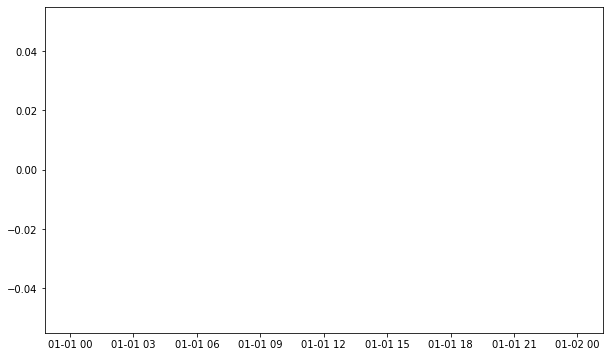

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Continue with your existing code...

# Time Series Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='_time', y='amountValue', hue='moduleType', style='moduleName')
plt.title('Time Series Plot of amountValue')
plt.xlabel('Time')
plt.ylabel('Amount Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # Place legend outside plot
plt.savefig(output_directory + base_file_name_without_extension + '_timeseries_plot.png')
plt.show()

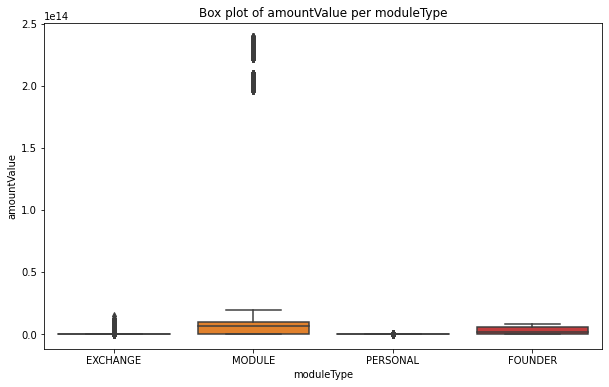

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

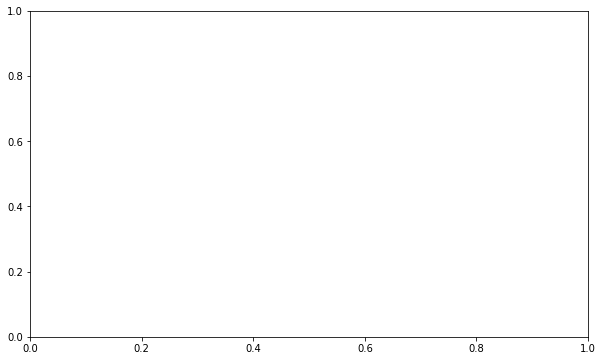

In [8]:
import seaborn as sns

# Box plot
plt.figure(figsize=(10,6))
sns.boxplot(x='moduleType', y='amountValue', data=df)
plt.title('Box plot of amountValue per moduleType')
plt.savefig(output_directory + base_file_name_without_extension + '_boxplot.png')
plt.show()

# Density plot
plt.figure(figsize=(10,6))
sns.kdeplot(df['amountValue'], fill=True)
plt.title('Density plot of amountValue')
plt.savefig(output_directory + base_file_name_without_extension + '_densityplot.png')
plt.show()



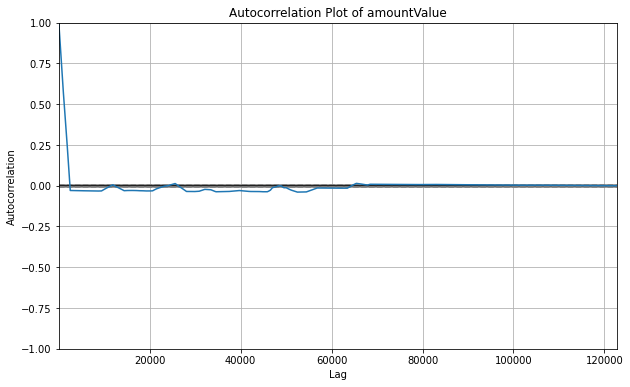

In [9]:
from pandas.plotting import autocorrelation_plot

# Autocorrelation plot
plt.figure(figsize=(10,6))
autocorrelation_plot(df['amountValue'])
plt.title('Autocorrelation Plot of amountValue')
plt.savefig(output_directory + base_file_name_without_extension + '_autocorrelation_plot.png')
plt.show()



In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition
# Note: You need to make sure your data is a time series indexed by datetime
df.set_index('_time', inplace=True)

# Perform seasonal decomposition
result = seasonal_decompose(df['amountValue'], model='additive', freq=24)  # assuming hourly data

# Plot the separate components
fig = result.plot()
fig.savefig(output_directory + base_file_name_without_extension + '_seasonal_decomposition.png')
plt.show()

